**<font size=8>The start of this machine learning tutorial</font>**<br>
<br>
By Quintin Lopez-Scarim

# Introduction
First we will define the sigmoid function : 
$$
S(x) = \dfrac{1}{1 + e^{-x}}
$$
On a graph this would appear as below.

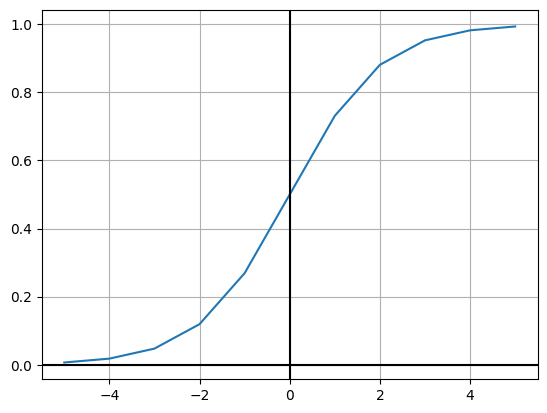

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-5,5,num=11)  #Getting each X-value
y = 1/(1 + math.e**(-x))      #Calculating y-values for each X
fig, ax = plt.subplots()      
plt.plot(x,y)
plt.grid(True)                #turning on the grid
ax.axhline(y=0, color='k')    #defining the axis
ax.axvline(x=0, color='k')


We will use the sigmoid function to bound a typical linear regression function to return a value between 1 and 0

# Syntax to be used throughout
$$
\hat{y} = \sigma (w^{T}x + b)
$$
$$\text{Where }\hat{y}\text{ is the predicted result, x is the passed values, and w and b are dictated by the algorithm.} $$

Our goal: 
$$\hat{y}^{(i)} = y^{(i)}$$ note: y is observed, non-predicted data

# Loss error functions
There exist square regression: 
$$\lambda(\hat{y},y) = \frac{1}{2}(\hat{y}-y)^2$$
however we tend instead to use
$$\lambda(\hat{y},y) = -(y\log{\hat{y}} + (1-y)\log{(1-\hat{y}}))$$
why does this function make sense? Well, suppose y=1;
$$\lambda(\hat{y},y) = -\log{(\hat{y})}$$

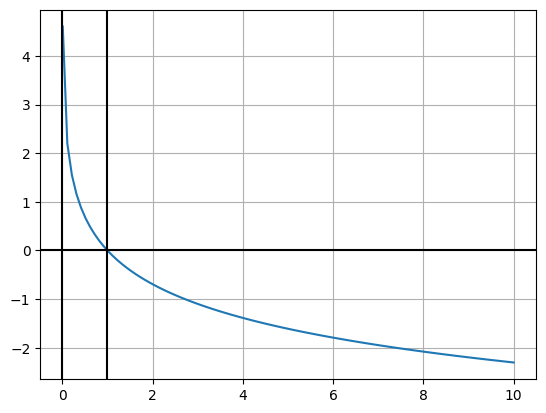

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

log_array = lambda y : -math.log(y) 
x = np.linspace(0.01,10,num=100)  #Getting each X-value
y = list(map(log_array,x))               #Calculating y-values for each X
fig, ax = plt.subplots()      
plt.plot(x,y)
plt.grid(True)                #turning on the grid
ax.axhline(y=0, color='k')    #defining the axis
ax.axvline(x=0, color='k')
ax.axvline(x=1, color = 'k')

$$\text{We see that the loss function is at zero when } \hat{y}\text{ is one}$$

Now suppose y = 0

$$\lambda(\hat{y},y) = -\log{(1 - \hat{y})}$$

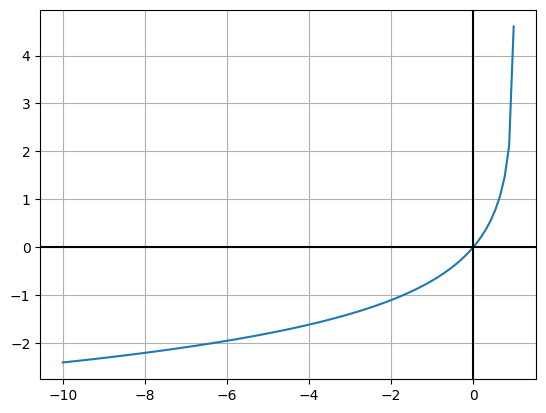

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

log_array = lambda y : -math.log(1-y) 
x = np.linspace(-10,.99,num=100)  #Getting each X-value
y = list(map(log_array,x))               #Calculating y-values for each X
fig, ax = plt.subplots()      
plt.plot(x,y)
plt.grid(True)                #turning on the grid
ax.axhline(y=0, color='k')    #defining the axis
ax.axvline(x=0, color='k')


$$\text{We see that the loss function is at zero when } \hat{y}\text{ is zero}$$

# Cost function
$$J(w,b) = \frac{1}{m}\sum_{1}^{m}\lambda(\hat{y}^{(i)},y^{(i)})$$

The average of the loss function for each value in the data set

# Gradient descent
We wish to optimize this cost function, and do so with gradient descent

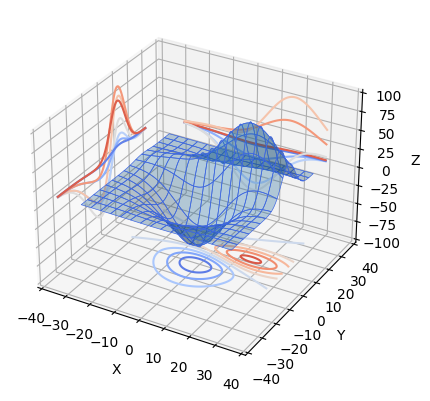

In [42]:
#taken from matplotlib examples - contour graphs are not fun to create 
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)




# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

The idea is essentially to get to the minimal Z value at the bottom of the contoured graph. <br>
Let's consider how to approach this in 2D. <br>
Say we have the following function: $$W = W - \alpha \frac{dJ(w,b)}{dw}$$

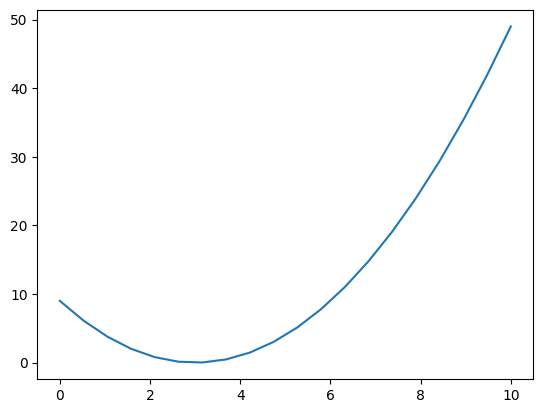

In [52]:
function = lambda X : (X-3) * (X-3) 
X = np.linspace(0,10,num=20)
Y = list(map(function,X))
plt.plot(X,Y)

Note: this is an arbitruary example J(w,b) function <br>
assuming we choose a point to the right or left of the minimum, we can see we approach the minimum after evaluating <br>
$$w = w - \alpha \frac{\partial J(w,b)}{\partial w}$$
why? well a positive slope (right side) shifts us left, and a negative slope (left) pushes us right

**In 3D**
<br>We also update b as thus:
$$b = b - \alpha \frac{\partial J(w,b)}{\partial b}$$

**Vectorization**

In [69]:
import numpy as np
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()
c_2 = np.array([])
tic_2 = time.time()
for value in enumerate(a):
    c += value[1] * b[value[0]]
toc_2 = time.time()
print("done")
print((toc-tic ) * 1000)
print((toc_2-tic_2)*1000)

done
2.007722854614258
381.8998336791992
